In [28]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from matplotlib import pyplot as plt

In [29]:
# Load the dataset (assuming it's in a CSV file with columns 'date' and 'quantity')
df = pd.read_csv("new_df.csv")

In [30]:
# Convert the 'date' column to datetime format if it's not already
df['everyday'] = pd.to_datetime(df['everyday'])

In [31]:
# Set the date column as the index
df.set_index('everyday', inplace=True)

In [32]:
# Split the data into training and testing sets (optional)
# You can experiment with different split ratios
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [33]:
# Fit the Holt-Winters model on the training data
model = ExponentialSmoothing(train['quantity'], seasonal_periods=12, trend='additive').fit()  # Adjust seasonality and trend as needed

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [35]:
# Generate forecasts for 3 months (90 days)
future_dates = train.index[-1] + pd.DateOffset(days=90)
forecast = model.predict(start=train.index[-1], end=future_dates)


KeyError: 'The `end` argument could not be matched to a location related to the index of the data.'

NameError: name 'forecast' is not defined

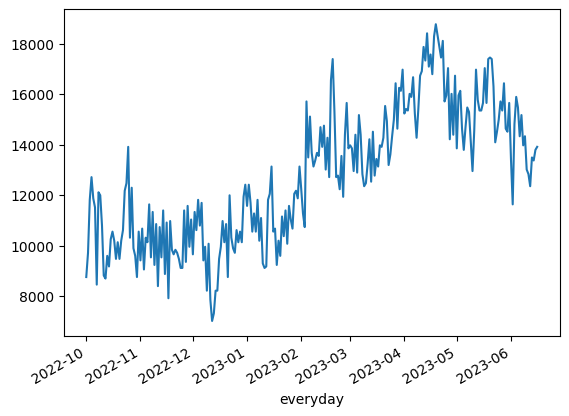

In [36]:
# Visualize actual vs predicted values
train['quantity'].plot(label='Actual')
forecast.plot(label='Forecast', alpha=0.7)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()